In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('chinese_dams.csv')

In [3]:
# Display the first few rows of the dataset
print(df.head())

           Name                 Province Second Province           Impounds  \
0  Zipingpu Dam                  Sichuan             NaN          Min River   
1   Zhikong Dam  Tibet Autonomous Region             NaN        Lhasa River   
2     Zhexi Dam                    Hunan             NaN      Zi Shui River   
3    Zhelin Dam                  Jiangxi             NaN       Zhelin River   
4    Zangmu Dam  Tibet Autonomous Region             NaN  Brahmaputra River   

   Height                     Type Complete  Storage capacity (million m3)  
0   156.0  Concrete-face rock-fill     2006                         1120.0  
1    50.0    Embankment, rock-fill     2007                          225.0  
2   104.0                  Gravity     1962                         3656.0  
3    72.5   Embankment, earth-fill     1972                         7900.0  
4   116.0                  Gravity     2015                           86.6  


In [4]:
# Summary statistics
print(df.describe())

          Height  Storage capacity (million m3)
count  158.00000                     158.000000
mean   132.54462                    3393.621772
std     58.00658                    5875.159589
min     29.00000                       6.770000
25%    101.25000                     294.250000
50%    125.50000                    1051.000000
75%    156.75000                    3363.500000
max    312.00000                   39300.000000


In [5]:
# Information about the dataset including column data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Name                           158 non-null    object 
 1   Province                       158 non-null    object 
 2   Second Province                9 non-null      object 
 3   Impounds                       158 non-null    object 
 4   Height                         158 non-null    float64
 5   Type                           158 non-null    object 
 6   Complete                       158 non-null    object 
 7   Storage capacity (million m3)  158 non-null    float64
dtypes: float64(2), object(6)
memory usage: 10.0+ KB
None


In [6]:
# Count dams by Province and Second Province
province = df['Province'].value_counts()
second_province = df['Second Province'].value_counts()

# Combine counts from both columns
province_counts = province.add(second_province, fill_value=0).astype(int)

# Create a DataFrame for better visualization
province_counts = pd.DataFrame(province_counts).reset_index()
province_counts.columns = ['Province', 'Count']

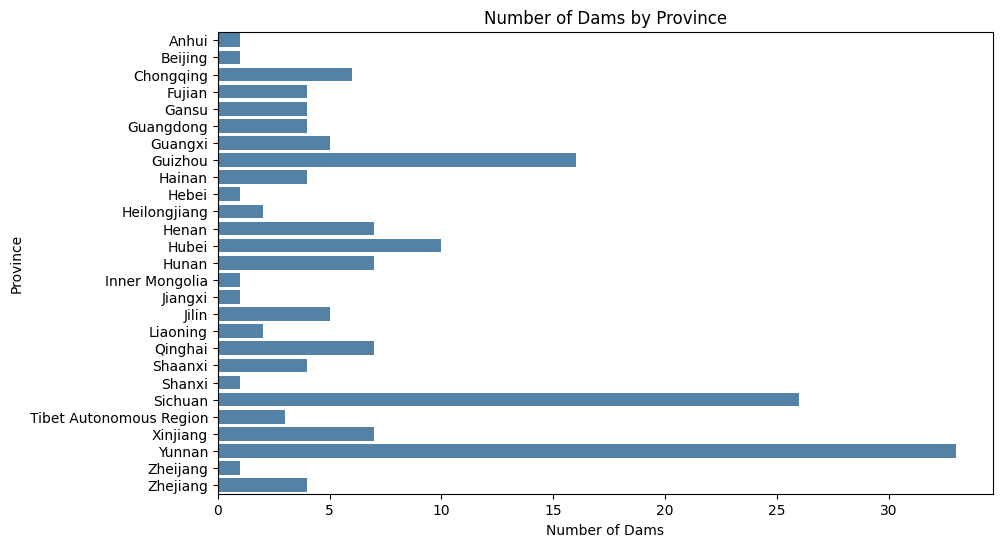

In [7]:
# Plot the number of dams per province
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Province', data=province_counts, color='steelblue')
plt.title('Number of Dams by Province')
plt.xlabel('Number of Dams')
plt.ylabel('Province')
plt.show()

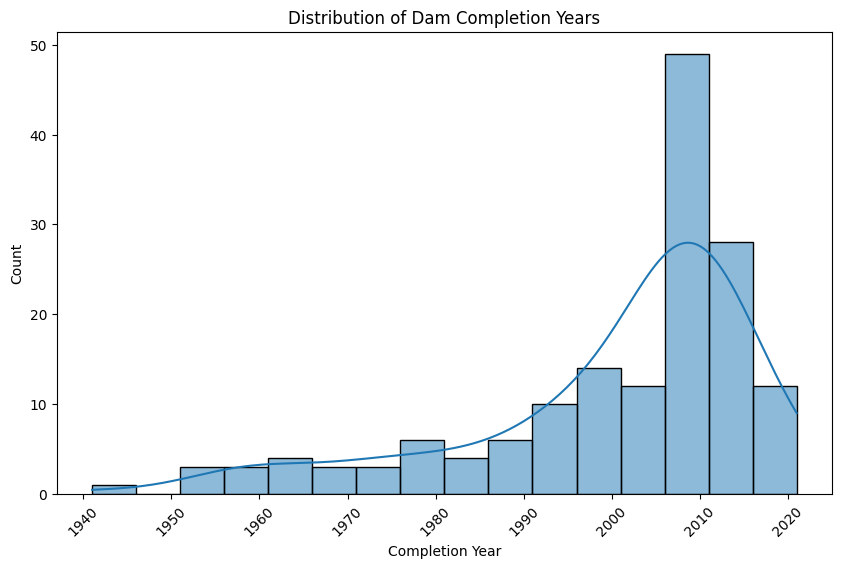

In [8]:
# Convert 'Complete' column to numeric and fix specific entries
df['Complete'] = df['Complete'].replace('1952/93', '1993').astype(int)

# Plot the distribution of completion years
plt.figure(figsize=(10, 6))
sns.histplot(df['Complete'], bins=16, kde=True)
plt.title('Distribution of Dam Completion Years')
plt.xlabel('Completion Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

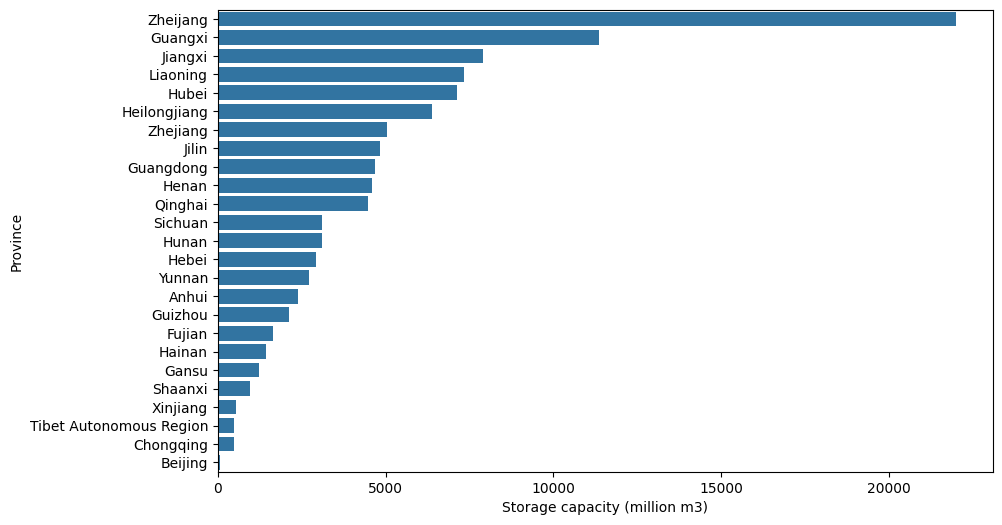

In [9]:
max_capacity = df.groupby('Province')['Storage capacity (million m3)'].mean().reset_index()
max_capacity.sort_values(by='Storage capacity (million m3)', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(data=max_capacity, y='Province', x='Storage capacity (million m3)')
plt.show()

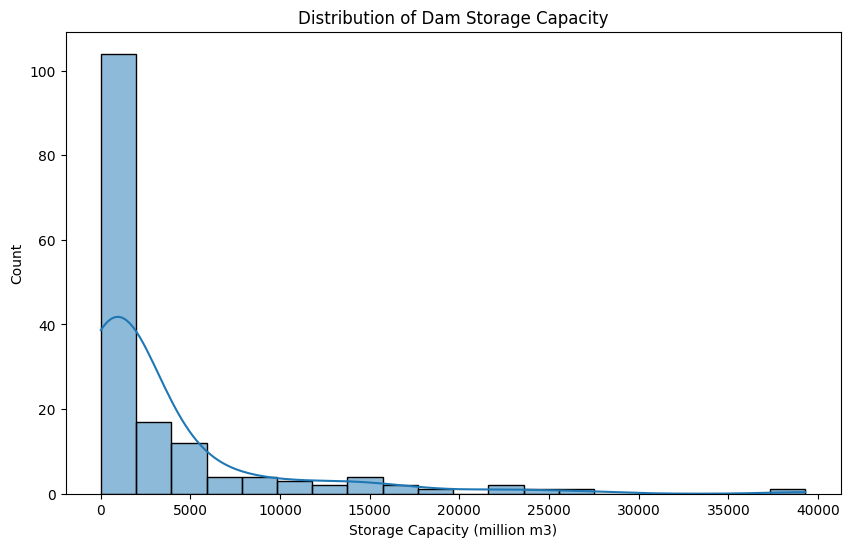

In [10]:
# Plot distribution of storage capacity
plt.figure(figsize=(10, 6))
sns.histplot(df['Storage capacity (million m3)'], bins=20, kde=True)
plt.title('Distribution of Dam Storage Capacity')
plt.xlabel('Storage Capacity (million m3)')
plt.ylabel('Count')
plt.show()

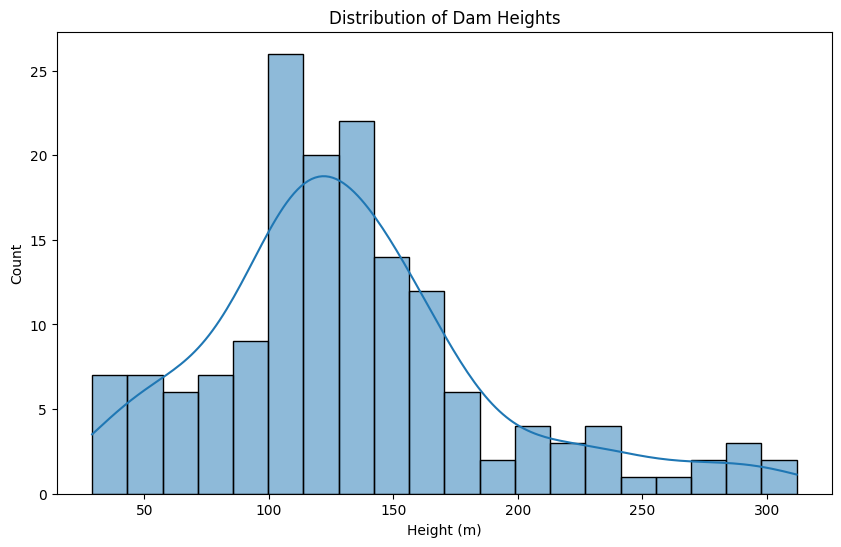

In [11]:
# Plot distribution of dam heights
plt.figure(figsize=(10, 6))
sns.histplot(df['Height'], bins=20, kde=True)
plt.title('Distribution of Dam Heights')
plt.xlabel('Height (m)')
plt.ylabel('Count')
plt.show()

In [12]:
# Calculate average storage capacity and height by province
avg_capacity = df.groupby('Province')['Storage capacity (million m3)'].mean().reset_index()
avg_capacity = avg_capacity.sort_values(by='Storage capacity (million m3)', ascending=False)

avg_height = df.groupby('Province')['Height'].mean().reset_index()
avg_height = avg_height.sort_values(by='Height', ascending=False)

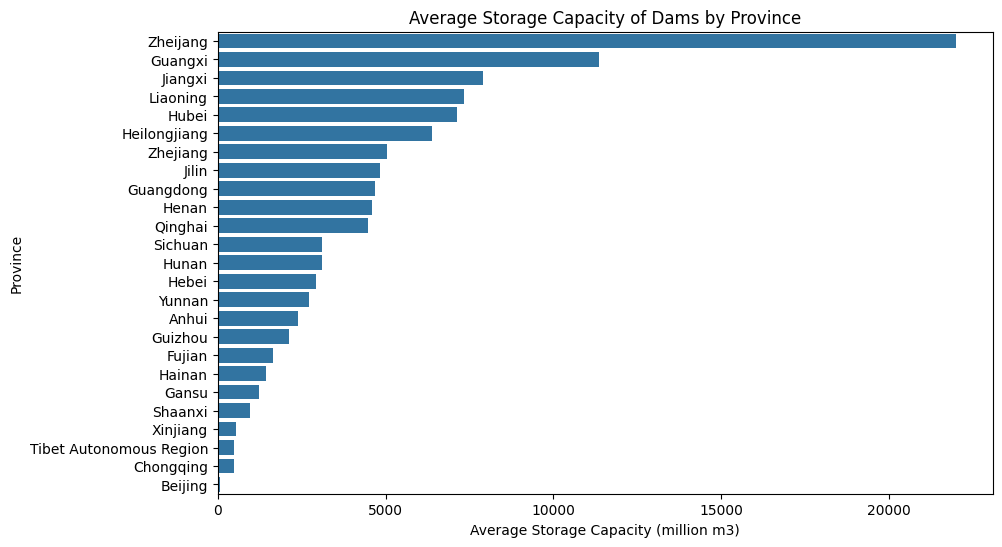

In [13]:
# Plot average storage capacity by province
plt.figure(figsize=(10, 6))
sns.barplot(x='Storage capacity (million m3)', y='Province', data=avg_capacity)
plt.title('Average Storage Capacity of Dams by Province')
plt.xlabel('Average Storage Capacity (million m3)')
plt.ylabel('Province')
plt.show()

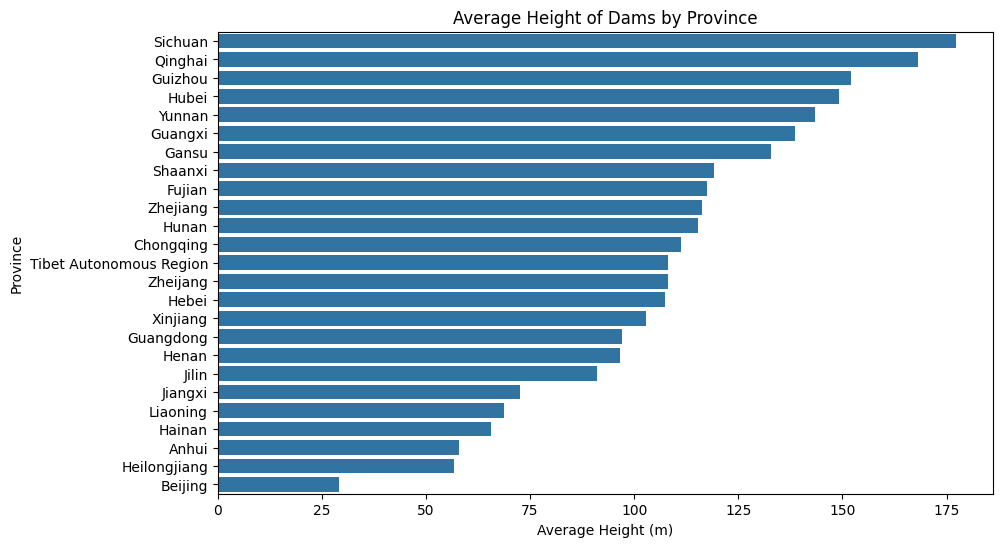

In [14]:
# Plot average height by province
plt.figure(figsize=(10, 6))
sns.barplot(x='Height', y='Province', data=avg_height)
plt.title('Average Height of Dams by Province')
plt.xlabel('Average Height (m)')
plt.ylabel('Province')
plt.show()